In [42]:
# Jitendar 202401100300132
# AI-B

import numpy as np
import matplotlib.pyplot as plt

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [44]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])


In [45]:
np.random.seed(42)

input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [46]:

learning_rate = 0.1
epochs = 5000
losses = []

In [47]:
for epoch in range(epochs):

    # ---- Forward Propagation ----
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # ---- Compute Loss (MSE) ----
    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)

    # ---- Backpropagation ----
    d_output = (y_pred - y) * sigmoid_derivative(y_pred)

    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)

    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # ---- Update Weights ----
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


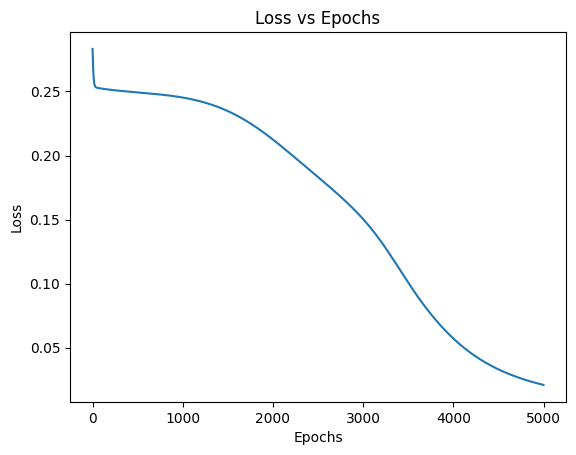

In [48]:
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [49]:
print("Final Predictions:")
print(y_pred.round(3))

Final Predictions:
[[0.103]
 [0.858]
 [0.853]
 [0.177]]
